In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import calendar

In [9]:
folder = r'C:\Users\LENOVO\Downloads'
folder = folder.replace('\\','/')
folder

'C:/Users/LENOVO/Downloads'

In [10]:
df = pd.read_csv(folder+'/data.csv',parse_dates=True).dropna()
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month'] = df['month'].astype(int)
df

,Date,ERA5,year,month
0,1979-01-02,0.0,1979,1
1,1979-01-03,0.0,1979,1
2,1979-01-04,0.0,1979,1
3,1979-01-05,0.0,1979,1
4,1979-01-06,0.0,1979,1
...,...,...,...,...
16428,2023-12-27,0.0,2023,12
16429,2023-12-28,0.0,2023,12
16430,2023-12-29,0.0,2023,12
16431,2023-12-30,0.0,2023,12


In [11]:
# Function to convert month number to month name
def month_num_to_name(month_num):
    return dt.date(2000, month_num, 1).strftime('%B')
df_sum = df.groupby(['year','month'])['ERA5'].sum().reset_index()
df_monthly_average = df_sum.groupby(['month']).mean().reset_index()
# Apply the function to the DataFrame
df_monthly_average['Month_Name'] = df_monthly_average['month'].apply(month_num_to_name)
df_monthly_average.drop(columns=['year'],inplace=True)
df_monthly_average

,month,ERA5,Month_Name
0,1,2.271778,January
1,2,2.649556,February
2,3,1.921556,March
3,4,2.016667,April
4,5,6.715556,May
5,6,9.820444,June
6,7,76.225111,July
7,8,73.018889,August
8,9,27.660667,September
9,10,6.272889,October


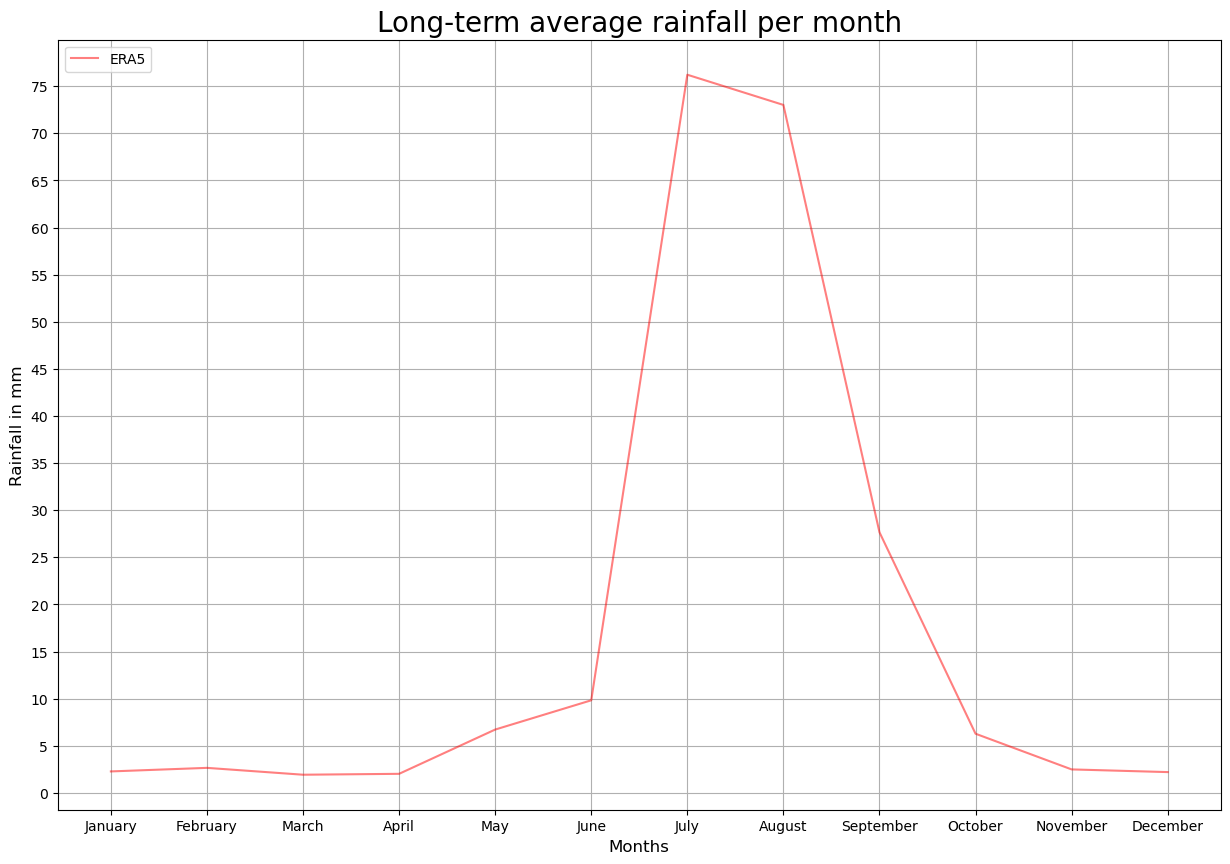

In [12]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(df_monthly_average['Month_Name'],df_monthly_average['ERA5'], color='#FF0000',label='ERA5',alpha=0.5)
axs.set_title('Long-term average rainfall per month',fontsize=20)
axs.set_ylabel('Rainfall in mm',fontsize='12')
axs.set_xlabel('Months',fontsize='12')
axs.set_yticks(range(0,int(df_monthly_average['ERA5'].max()), 5))
axs.legend(loc='upper left')
axs.grid()